In [ ]:
#Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
import tensorflow as tf

In [ ]:
#loading MNIST dataset
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:

print(f'Shape of the training data: {x_train.shape}')
print(f'Shape of the training target: {y_train.shape}')
print(f'Shape of the test data: {x_test.shape}')
print(f'Shape of the test target: {y_test.shape}')

Shape of the training data: (60000, 28, 28)
Shape of the training target: (60000,)
Shape of the test data: (10000, 28, 28)
Shape of the test target: (10000,)


In [ ]:
#Importing important functions and models
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D # convolution layers
from tensorflow.keras.layers import Dense, Dropout, Flatten # core layers

from tensorflow.keras.utils import to_categorical

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(f"Label size {y_train.shape}")
print(f"Label size {y_test.shape}")

Label size (60000, 10)
Label size (10000, 10)


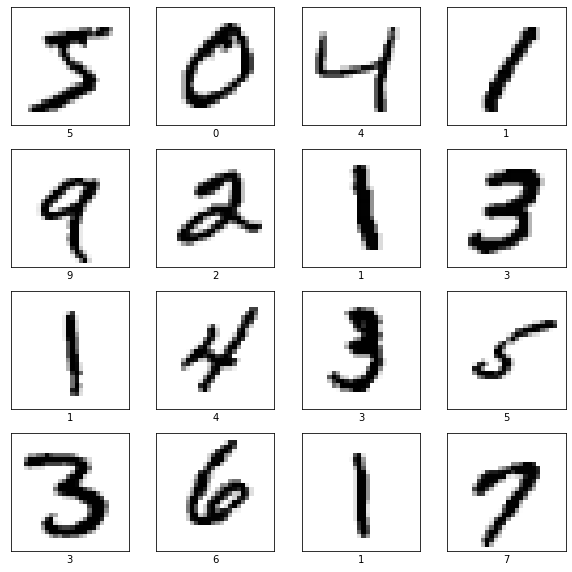

In [ ]:
#Plotting the hanndwritten digits of the MNIST dataset
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i].argmax())
plt.show()

In [ ]:
# Reshaping the data
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

# Normalizing
x_train = x_train/255
x_test = x_test/255

In [ ]:
#Creating the CNN model
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu',padding='same', input_shape=(28, 28, 1))) #convolutional layer
model.add(MaxPooling2D(2, 2)) #pooling layer
model.add(Dropout(0.1)) #dropout layer to prevent overfitting
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.1))
model.add(Flatten()) #flattening layer to make the 1-D array
model.add(Dense(128, activation='relu')) #fully connected layer
model.add(Dense(10, activation='softmax')) #output layer with activation function softmax as it's a classification problem

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy']) #learning rate is 0.001 as we used adam optimiser and this is it's default

In [ ]:

epochs=6
history = model.fit(x_train,y_train, 
                    epochs = epochs, batch_size=256,
                    validation_data = (x_test,y_test),
                    verbose=1)

Epoch 1/6
235/235 [==============================] - 130s 549ms/step - loss: 0.2669 - accuracy: 0.9219 - val_loss: 0.0594 - val_accuracy: 0.9814
Epoch 2/6
235/235 [==============================] - 129s 549ms/step - loss: 0.0658 - accuracy: 0.9802 - val_loss: 0.0463 - val_accuracy: 0.9830
Epoch 3/6
235/235 [==============================] - 130s 552ms/step - loss: 0.0478 - accuracy: 0.9854 - val_loss: 0.0332 - val_accuracy: 0.9882
Epoch 4/6
235/235 [==============================] - 129s 549ms/step - loss: 0.0361 - accuracy: 0.9892 - val_loss: 0.0378 - val_accuracy: 0.9877
Epoch 5/6
235/235 [==============================] - 129s 547ms/step - loss: 0.0282 - accuracy: 0.9912 - val_loss: 0.0285 - val_accuracy: 0.9901
Epoch 6/6
235/235 [==============================] - 128s 546ms/step - loss: 0.0250 - accuracy: 0.9923 - val_loss: 0.0280 - val_accuracy: 0.9898


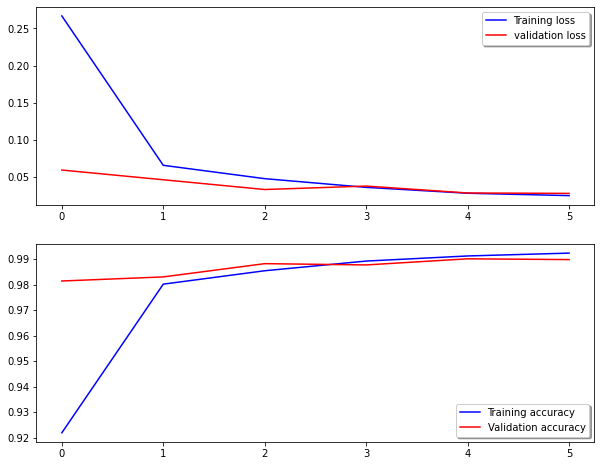

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(10, 8))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred_labels=[]
for i in range(len(y_pred)):
    y_pred_labels.append(y_pred[i].argmax())

In [ ]:
y_test_labels=[]
for i in range(len(y_test)):
    y_test_labels.append(y_test[i].argmax())

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_labels,y_pred_labels)

array([[ 974,    0,    0,    0,    0,    0,    3,    2,    1,    0],
       [   0, 1130,    0,    0,    0,    1,    1,    2,    1,    0],
       [   1,    0, 1020,    0,    2,    0,    0,    8,    1,    0],
       [   2,    0,    1,  990,    0,   11,    0,    3,    2,    1],
       [   0,    0,    0,    0,  978,    0,    1,    0,    0,    3],
       [   2,    0,    0,    1,    0,  882,    1,    3,    2,    1],
       [   0,    2,    0,    0,    1,    2,  953,    0,    0,    0],
       [   0,    0,    2,    0,    0,    0,    0, 1024,    1,    1],
       [   3,    0,    2,    0,    1,    1,    2,    3,  960,    2],
       [   0,    1,    1,    0,    6,    5,    0,    7,    2,  987]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_labels,y_pred_labels))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       1.00      0.98      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       0.97      1.00      0.98      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



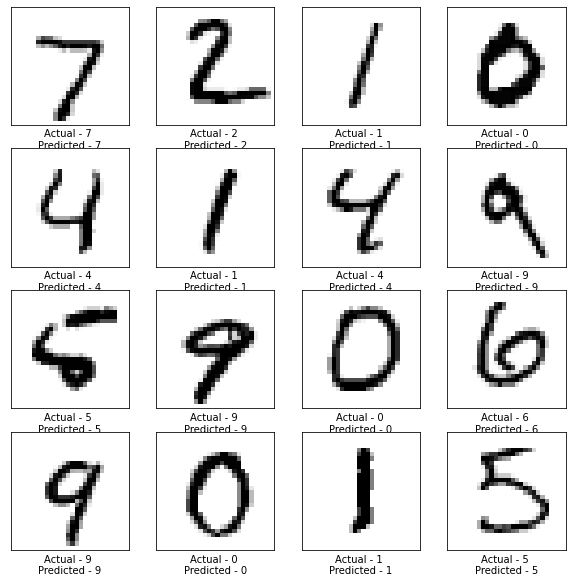

In [ ]:
#Testing the model after training is over
test_img = x_test.reshape(x_test.shape[0], 28, 28)

plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_img[i], cmap=plt.cm.binary)
    plt.xlabel(f'Actual - {y_test[i].argmax()} \nPredicted - {y_pred[i].argmax()}')
plt.show()